In [163]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
import MathOptInterface as MOI
import Ipopt 
using LinearAlgebra, Plots
import FiniteDiff
import ForwardDiff as FD
using MeshCat
using Test
using Plots

include(joinpath(@__DIR__, "utils", "fmincon.jl"))

  Activating project at `c:\Users\aphia\Desktop\school\ocrl\QuadraCat`


fmincon (generic function with 1 method)

In [209]:
include(joinpath(@__DIR__, "utils", "quadruped_new.jl"))
model = UnitreeA1()
@show num_positions(model.mech)
@show num_velocities(model.mech)
@show joints(model.mech)
@show bodies(model.mech)

num_positions(model.mech) = 19
num_velocities(model.mech) = 18
joints(model.mech) = Joint{Float64, JT} where JT<:JointType{Float64}[Joint "base_to_world": Quaternion floating joint, Joint "floating_base": Fixed joint, Joint "imu_joint": Fixed joint, Joint "FR_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "FL_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "RR_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "RL_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "FR_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "FL_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RR_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RL_thigh_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "FR_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "FL_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RR_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0], Joint "RL_calf_joint": Revolute joi

20-element Vector{RigidBody{Float64}}:
 RigidBody: "world"
 RigidBody: "base"
 RigidBody: "trunk"
 RigidBody: "imu_link"
 RigidBody: "FR_hip"
 RigidBody: "FL_hip"
 RigidBody: "RR_hip"
 RigidBody: "RL_hip"
 RigidBody: "FR_thigh"
 RigidBody: "FL_thigh"
 RigidBody: "RR_thigh"
 RigidBody: "RL_thigh"
 RigidBody: "FR_calf"
 RigidBody: "FL_calf"
 RigidBody: "RR_calf"
 RigidBody: "RL_calf"
 RigidBody: "FR_foot"
 RigidBody: "FL_foot"
 RigidBody: "RR_foot"
 RigidBody: "RL_foot"

In [183]:
xic = initial_state(model)
q = xic[1:num_positions(model.mech)]

@show get_trunk_position(model, q)
@show get_foot_position(model, q, "RR")
@show get_foot_position(model, q, "FL")
@show get_trunk_velocity(model, xic)

get_trunk_position(model, q) = [0.0, 0.0, 0.2571150438746157]
get_foot_position(model, q, "RR") = [-0.183, -0.13205, -2.7755575615628914e-17]
get_foot_position(model, q, "FL") = [0.183, 0.13205, -2.7755575615628914e-17]
get_trunk_velocity(model, xic) = [0.0, 0.0, 0.0]


3-element SVector{3, Float64} with indices SOneTo(3):
 0.0
 0.0
 0.0

In [184]:
# visualize initial state
mvis = initialize_visualizer(model)
xic = initial_state(model)
set_configuration!(mvis, xic[1:num_positions(model.mech)])
render(mvis)

┌ Info: Listening on: 127.0.0.1:8739, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8739
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("trunk" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x2f, 0x74, 0x72, 0x75, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_floating_base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_hip" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6e, 0x6b, 0x2f, 0x52, 0x4c, 0x5f, 0x68, 0x69, 0x70], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x2f, 0x52, 0x4c, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_17" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x68, 0x2f, 0x52, 0x4c, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x66, 0x2f, 0x52, 0x4c, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6f, 0x6f, 0x74, 0x5f, 0x66, 0x69, 0x78, 0x65, 0x64], Dict{String, Vector{UInt8}}(), not

In [185]:
# visualize goal state
mvis = initialize_visualizer(model)
xg = goal_state(model)
set_configuration!(mvis, xg[1:num_positions(model.mech)])
render(mvis)

┌ Info: Listening on: 127.0.0.1:8740, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8740
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("trunk" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x2f, 0x74, 0x72, 0x75, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_floating_base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_hip" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6e, 0x6b, 0x2f, 0x52, 0x4c, 0x5f, 0x68, 0x69, 0x70], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x2f, 0x52, 0x4c, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_17" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x68, 0x2f, 0x52, 0x4c, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x66, 0x2f, 0x52, 0x4c, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6f, 0x6f, 0x74, 0x5f, 0x66, 0x69, 0x78, 0x65, 0x64], Dict{String, Vector{UInt8}}(), not

In [193]:
## reference trajectory

function reference_trajectory(model::UnitreeA1, nu, box_height=0.3, box_distance=0.7)

    tf = 0.5
    Δt = 1e-2
    t_vec = collect(0:Δt:tf)
    g = -9.81

    vx = box_distance/tf
    vz = (box_height - 0.5*g*tf^2)/tf #sqrt(box_height*2*g)
    @show vx
    @show vz
    v_des_vec = zeros(num_velocities(model.mech))
    v_des_vec[6] = vz
    v_des_vec[4] = vx

    xic = initial_state(model)
    state = MechanismState(model.mech)
    set_configuration!(state, xic[1:num_positions(model.mech)])
    set_velocity!(state, v_des_vec)
    ts, qs, vs = simulate(state, tf; Δt = Δt)

    N = length(t_vec) + 6
    t_extend = collect(Δt*(1:6)) .+ tf

    Xref = [[qs[i]; vs[i]; 0.1] for i in 1:length(qs)]
    Xref = vcat(fill(first(Xref), 3), Xref, fill(last(Xref), 3))
    Uref = [0.001*randn(nu) for i in 1:(N-1)]

    return Xref, Uref, [t_vec;t_extend]
end

reference_trajectory (generic function with 3 methods)

In [194]:
Xref, Uref, t_vec = reference_trajectory(model, control_dim(model))

vx = 1.4
vz = 3.0525


([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2571150438746157, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2571150438746157, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2571150438746157, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2571150438746157, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1], [1.0, 0.0, 0.0, 0.0, 0.013999999999999999, -6.533509221139948e-21, 0.2871495438746157, 1.439485765761672e-18, -5.602952156083489e-19, 2.5169566371858637e-18  …  -3.002344510650964e-16, 4.2971292381209903e-16, 3.7193285052643586e-16, 1.315184850312538e-16, 9.615948365194206e-17, -5.078830926197832e-16, -4.2347704270422773e-16, -3.044903805736668e-16, -2.580053972756742e-16, 0.1], [1.0, 0.0, 0.0, 0.0, 0.027999999999999997, -3.833436532811705e-20, 0.31620304387461573, 6.230206399991308e-18, -2.9612087191012467e-18, 

In [189]:
@show length(Xref)
@show length(Uref)
@show length(t_vec)

length(Xref) = 57
length(Uref) = 56
length(t_vec) = 57


57

In [195]:
qs = [xk[1:num_positions(model.mech)] for xk in Xref] # extract positions from state vector

mvis = initialize_visualizer(model)
xic = initial_state(model)
set_configuration!(mvis, xic[1:num_positions(model.mech)])
anim = MeshCat.Animation(mvis, t_vec, qs)
setanimation!(mvis, anim)
render(mvis)

┌ Info: Listening on: 127.0.0.1:8742, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8742
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("trunk" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x2f, 0x74, 0x72, 0x75, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_floating_base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_hip" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6e, 0x6b, 0x2f, 0x52, 0x4c, 0x5f, 0x68, 0x69, 0x70], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x2f, 0x52, 0x4c, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_17" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x68, 0x2f, 0x52, 0x4c, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x66, 0x2f, 0x52, 0x4c, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0

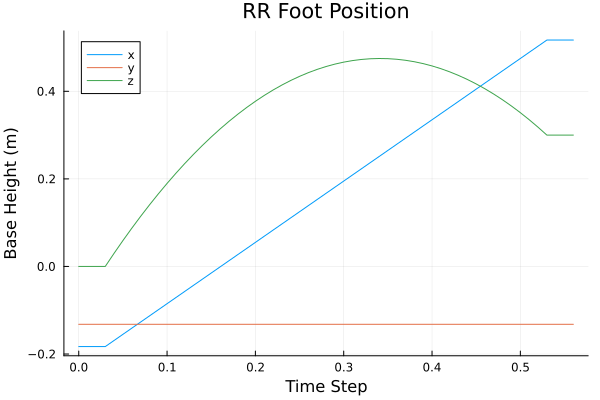

In [192]:
RR_foot_poss = [get_foot_position(model, qs[i]) for i in 1:length(qs)]
RR_foot_poss_m = hcat(RR_foot_poss...)
plot(t_vec, RR_foot_poss_m', xlabel="Time Step", ylabel="Base Height (m)", title="RR Foot Position", label=["x" "y" "z"])

In [200]:
## set up discrete time dynamics

# our continuous time dynamics function is xdot = dynamics(model, x, u)

function hermite_simpson_ground(params::NamedTuple, x1::Vector, x2::Vector, u::Vector, dt::Real)::Vector
    model = params.model
    x12 = 0.5*(x1+x2) + dt/8*(dynamics(model, x1, u) - dynamics(model, x2, u))
    return x1 + dt/6 * (dynamics(model, x1, u) + 4 * dynamics(model, x12, u) + dynamics(model, x2, u)) - x2
end

hermite_simpson_ground (generic function with 1 method)

In [201]:
## set up cost

function quadracat_cost(params::NamedTuple, Z::Vector)::Real
    idx, N = params.idx, params.N
    Q, R, Qf = params.Q, params.R, params.Qf
    Xref,Uref = params.Xref, params.Uref

    J = 0
    for i=1:(N-1)
        xi = Z[idx.x[i][1:end-1]]
        J += 0.5*(xi - Xref[i][1:end-1])'*Q*(xi - Xref[i][1:end-1]) + 0.5*(Z[idx.u[i]] - Uref[i])'*R*(Z[idx.u[i]] - Uref[i])
    end
    xN = Z[idx.x[N][1:end-1]]
    J += (xN - Xref[N][1:end-1])'*Qf*(xN - Xref[N][1:end-1])
        
    return J

end

quadracat_cost (generic function with 1 method)

In [211]:
## set up equality constraints 

function quadracat_dynamics_constraints(params::NamedTuple, Z::Vector)::Vector
    idx, N = params.idx, params.N

    c = zeros(eltype(Z), idx.nc)

    for i=1:(N-1)
        xk = Z[idx.x[i][1:end-1]]
        uk = Z[idx.u[i]]
        xk1 = Z[idx.x[i+1][1:end-1]]
        dt = Z[idx.x[i][end]]

        c[idx.c[i]] = hermite_simpson_ground(params, xk, xk1, uk, dt)
    end
    return c 
end

function quadracat_stance_constraint(params::NamedTuple, Z::Vector)::Vector
    idx, N, dt, model = params.idx, params.N, params.dt, params.model
    nq = params.nq
        
    # create c in a ForwardDiff friendly way (check HW0)
    c = zeros(eltype(Z), 0)
    
    # each foot is pinned to the ground
    for i=[1:3; N-2:N]
        xk = Z[idx.x[i]]
        q = xk[1:nq]
        c = vcat(c, [
                            get_foot_position(model, q, "RR")[3]; 
                            get_foot_position(model, q, "RL")[3];
                            get_foot_position(model, q, "FL")[3];
                            get_foot_position(model, q, "FR")[3]
                            ])
    end

    return c

end

function quadracat_equality_constraint(params::NamedTuple, Z::Vector)::Vector
    N, idx, xic = params.N, params.idx, params.xic
    
    # TODO: stack up all of our equality constraints 
    
    # should be length 2*nx + (N-1)*nx + N 
    # inital condition constraint (nx)       (constraint 1)
    # terminal constraint         (nx)       (constraint 2)
    # dynamics constraints        (N-1)*nx   (constraint 3-6)
    # stance constraint           N          (constraint 7-8)
    ic_con = Z[idx.x[1][1:end-1]] - xic
    return [ic_con; 
    quadracat_dynamics_constraints(params, Z); 
    quadracat_stance_constraint(params, Z)
    ]
end

quadracat_equality_constraint (generic function with 1 method)

In [212]:
## set up inequality constraint 

function quadracat_inequality_constraint(params::NamedTuple, Z::Vector)::Vector
    idx, N, dt = params.idx, params.N, params.dt
    model = params.model
        
    # create c in a ForwardDiff friendly way (check HW0)
    c = zeros(eltype(Z), 4*N)
    for i=1:N 
        c[4*(i-1) .+ (1:4)] = [
            get_foot_position(model, q, "FL")[3];
            get_foot_position(model, q, "FR")[3];
            get_foot_position(model, q, "RR")[3];
            get_foot_position(model, q, "RL")[3]
        ]
    end

    return c
end

quadracat_inequality_constraint (generic function with 1 method)

In [205]:
function solve_quadracat_crouch(;verbose=true)
    
    # problem size 
    nq = num_positions(model.mech)
    nv = num_velocities(model.mech)
    nx = nq+nv+1
    nu = control_dim(model)
    
    Xref, Uref, t_vec = reference_trajectory(model, control_dim(model))
    N = length(t_vec)
    
    # LQR cost 
    Q = diagm(ones(nx-1))
    R = 0.1*diagm(ones(nu))
    Qf = 10*diagm(ones(nx-1))
    
    # indexing 
    idx = create_idx(nx,nu,N)
    
    # initial and goal states 
    xic = initial_state(model)
    xg = goal_state(model)

    # initial guess 
    z0 = zeros(idx.nz)
    for i=1:(N-1)
        z0[idx.x[i]] = Xref[i]
        z0[idx.u[i]] = Uref[i]
    end
    z0[idx.x[N]] = Xref[N]

    # load all useful things into params 
    params = (
        model=model,
        nx=nx, 
        nu=nu, 
        nq=nq,
        nv=nv,
        Q = Q, 
        R = R, 
        Qf = Qf, 
        xic = xic, 
        xg=xg,
        dt = dt, 
        N = N, 
        idx = idx,
        g = 9.81,
        Xref=Xref,
        Uref=Uref
        )
    
    # TODO: primal bounds 
    # height of body must be above ground
    x_l = -Inf*ones(idx.nz)
    x_u = Inf*ones(idx.nz)
    for i = 1:N
        x_l[idx.x[i][7]] = 0
    end
    
    # inequality constraint bounds
    c_l = zeros(4*N)
    c_u = Inf*ones(4*N)
    
    # choose diff type (try :auto, then use :finite if :auto doesn't work)
    diff_type = :auto 
#     diff_type = :finite
    
    
    Z = fmincon(quadracat_cost,quadracat_equality_constraint,quadracat_inequality_constraint,
                x_l,x_u,c_l,c_u,z0,params, diff_type;
                tol = 1e-6, c_tol = 1e-6, max_iters = 10_000, verbose = verbose)
    
    # pull the X and U solutions out of Z 
    X = [Z[idx.x[i]] for i = 1:N]
    U = [Z[idx.u[i]] for i = 1:(N-1)]
    
    return X, U, t_vec, params 
end

solve_quadracat_crouch (generic function with 1 method)

In [ ]:
X, U, t_vec, params_dircol = solve_quadracat_crouch(verbose=true)

vx = 1.4
vz = 3.0525
---------checking dimensions of everything----------
---------all dimensions good------------------------
---------diff type set to :auto (ForwardDiff.jl)----
---------testing objective gradient-----------------
---------testing constraint Jacobian----------------
